# ANALYSIS: PLOTS

In [18]:
import tweepy
import csv
import pandas as pd
import psycopg2

try:
    conn = psycopg2.connect("dbname=eksploracja_danych user=postgres password=postgres", host="localhost")
    print "Connected to the database"
except:
    print "I am unable to connect to the database"
    
cur = conn.cursor()

# Try on connection

try:
    cur.execute("""SELECT id, phrase FROM hashtag""")
    cur.execute("""SELECT author_id, tweet_id, date FROM re_tweet""")
    cur.execute("""SELECT id, name FROM author""")
    cur.execute("""SELECT id, author_id, searched_hashtag_id, date, content from tweet""")
    print "Properly set all tables"
except:
    print "I can't properly commit transactions to DB"

Connected to the database
Properly set all tables


In [2]:

# -- średnie wszystkiego bez podziału na autorów
# select avg(followers_count), stddev_samp(followers_count), min(followers_count), max(followers_count) from author;
# select avg(statuses_count), stddev_samp(statuses_count), min(statuses_count), max(statuses_count) from author;
# select avg(friends_count), stddev_samp(friends_count), min(friends_count), max(friends_count) from author;
# select avg(retweet_count), stddev_samp(retweet_count), min(retweet_count), max(retweet_count) from tweet;
# select avg(favorite_count), stddev_samp(favorite_count), min(favorite_count), max(favorite_count) from tweet;
# select avg(array_length(regexp_split_to_array(tweet.content, ' '), 1)) as tweet_len from author inner join tweet on author.id::bigint = tweet.author_id::bigint;

# -- średnie per autor

# -- srednia ilość znaków w tweet per author
# select avg(array_length(regexp_split_to_array(tweet.content, ' '), 1)) as tweet_len, author_id from tweet group by author_id order by tweet_len desc

# -- srednia ilość rt tweeta per author
# select avg(retweet_count) as tweet_rt, author_id from tweet group by author_id order by tweet_rt desc

# -- srednia polubien twittow per author
# select avg(favorite_count) as tweet_fav, author_id from tweet group by author_id order by tweet_fav desc

# -- statystyki dla autorów wszystkich

# -- srednia, stddev, min, max RT twittow autorow
# select avg(r.tweet_rt), stddev_samp(r.tweet_rt), min(r.tweet_rt), max(r.tweet_rt) from (select avg(retweet_count) as tweet_rt from tweet group by author_id) as r;

# -- srednia, stddev, min, max polubien twittow autorow
# select avg(r.tweet_fav), stddev_samp(r.tweet_fav), min(r.tweet_fav), max(r.tweet_fav) from (select avg(favorite_count) as tweet_fav from tweet group by author_id) as r;

# -- srednia ilość znaków w tweet autorow
# select avg(r.tweet_len), stddev_samp(r.tweet_len), min(r.tweet_len), max(r.tweet_len) from (select avg(array_length(regexp_split_to_array(tweet.content, ' '), 1)) as tweet_len from tweet group by author_id) as r; 


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_values(title, sql, avg):
    cur.execute(sql)
    conn.commit()
    result = cur.fetchall()
    # print(result[0:10])
    fba = [0 if x[1] is None else math.sqrt(int(x[1])) for x in result]
    # print(fba[:10])
    fba.sort(reverse=True)
    # print(fba[:10])


    x = np.arange(len(fba))

    fig, ax = plt.subplots(figsize=(15, 5))
    plt.suptitle(title)
    plt.bar(x, fba)
    plt.plot(np.ones(len(fba))*math.sqrt(avg), color='red')
    plt.xticks([])
    plt.show()



## FOLLOWERS

In [4]:
followers_avg_sql = "select avg(followers_count) from author;"
followers_min_sql = "select min(followers_count) from author;"
followers_max_sql = "select max(followers_count) from author;"
followers_stddev_sql = "select stddev(followers_count) from author;"

cur.execute(followers_avg_sql)
conn.commit()
followers_avg = cur.fetchone()[0]

cur.execute(followers_min_sql)
conn.commit()
followers_min = cur.fetchone()[0]

cur.execute(followers_max_sql)
conn.commit()
followers_max = cur.fetchone()[0]

cur.execute(followers_stddev_sql)
conn.commit()
followers_stddev = cur.fetchone()[0]

print("FOLLOWERS")
print(followers_avg)
print(followers_min)
print(followers_max)
print(followers_stddev)

FOLLOWERS
2184.1743976581850934
0
875777
19551.86984960


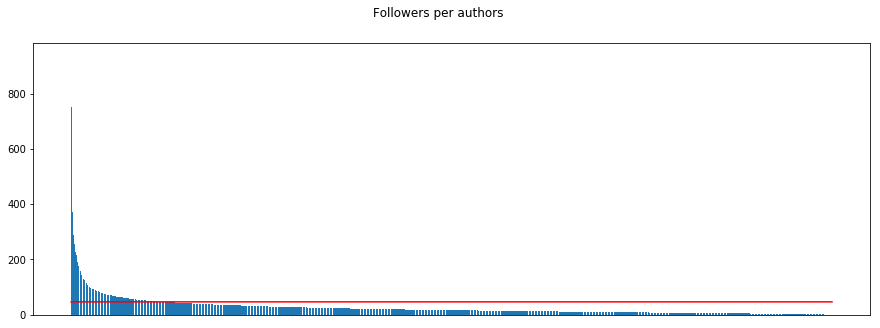

In [5]:
followers_by_authors_sql = "select name, followers_count from author"

plot_values('Followers per authors', 
           followers_by_authors_sql, 
           followers_avg)

## STATUSES

In [6]:
statuses_avg_sql = "select avg(statuses_count) from author;"
statuses_min_sql = "select min(statuses_count) from author;"
statuses_max_sql = "select max(statuses_count) from author;"
statuses_stddev_sql = "select stddev(statuses_count) from author;"

cur.execute(statuses_avg_sql)
conn.commit()
statuses_avg = cur.fetchone()[0]

cur.execute(statuses_min_sql)
conn.commit()
statuses_min = cur.fetchone()[0]

cur.execute(statuses_max_sql)
conn.commit()
statuses_max = cur.fetchone()[0]

cur.execute(statuses_stddev_sql)
conn.commit()
statuses_stddev = cur.fetchone()[0]

print("STATUSES")
print(statuses_avg)
print(statuses_min)
print(statuses_max)
print(statuses_stddev)

STATUSES
17173.346430984013
0
620478
32765.07816189


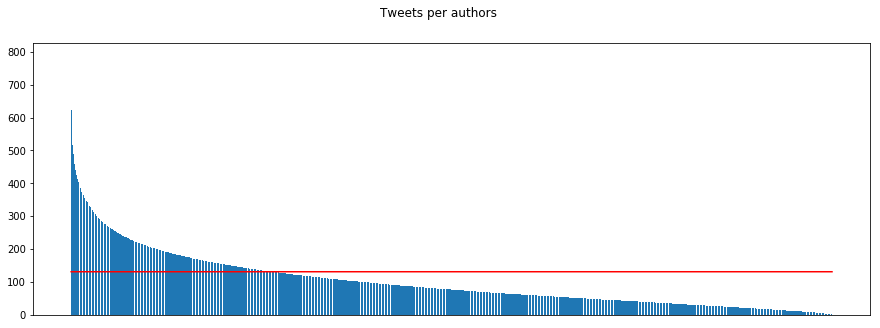

In [7]:
statuses_by_authors_sql = "select name, statuses_count from author"

plot_values('Tweets per authors', 
           statuses_by_authors_sql, 
           statuses_avg)

## FRIENDS

In [8]:
friends_avg_sql = "select avg(friends_count) from author;"
friends_min_sql = "select min(friends_count) from author;"
friends_max_sql = "select max(friends_count) from author;"
friends_stddev_sql = "select stddev(friends_count) from author;"

cur.execute(friends_avg_sql)
conn.commit()
friends_avg = cur.fetchone()[0]

cur.execute(friends_min_sql)
conn.commit()
friends_min = cur.fetchone()[0]

cur.execute(friends_max_sql)
conn.commit()
friends_max = cur.fetchone()[0]

cur.execute(friends_stddev_sql)
conn.commit()
friends_stddev = cur.fetchone()[0]

print("FRIENDS")
print(friends_avg)
print(friends_min)
print(friends_max)
print(friends_stddev)

FRIENDS
814.3935018050541516
0
87814
1418.449193034295


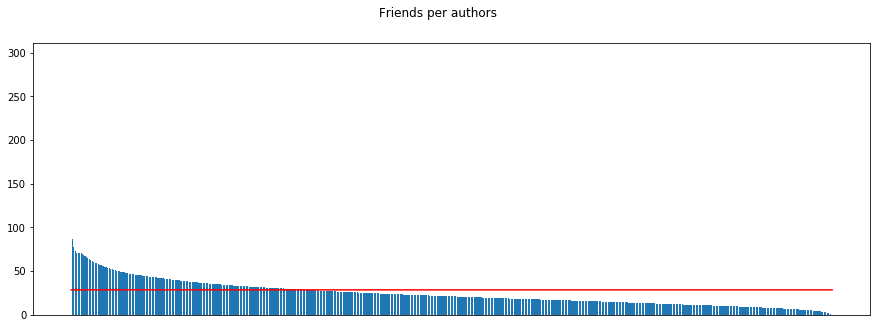

In [9]:
friends_by_authors_sql = "select name, friends_count from author where friends_count is not null"

plot_values('Friends per authors', 
           friends_by_authors_sql, 
           friends_avg)

## RETWEETS

In [10]:
retweet_avg_sql = "select avg(retweet_count) from tweet;"
retweet_min_sql = "select min(retweet_count) from tweet;"
retweet_max_sql = "select max(retweet_count) from tweet;"
retweet_stddev_sql = "select stddev(retweet_count) from tweet;"

cur.execute(retweet_avg_sql)
conn.commit()
retweet_avg = cur.fetchone()[0]

cur.execute(retweet_min_sql)
conn.commit()
retweet_min = cur.fetchone()[0]

cur.execute(retweet_max_sql)
conn.commit()
retweet_max = cur.fetchone()[0]

cur.execute(retweet_stddev_sql)
conn.commit()
retweet_stddev = cur.fetchone()[0]

print("RETWEETS")
print(retweet_avg)
print(retweet_min)
print(retweet_max)
print(retweet_stddev)

RETWEETS
10.2001834441641825
0
1038
44.1889765817504231


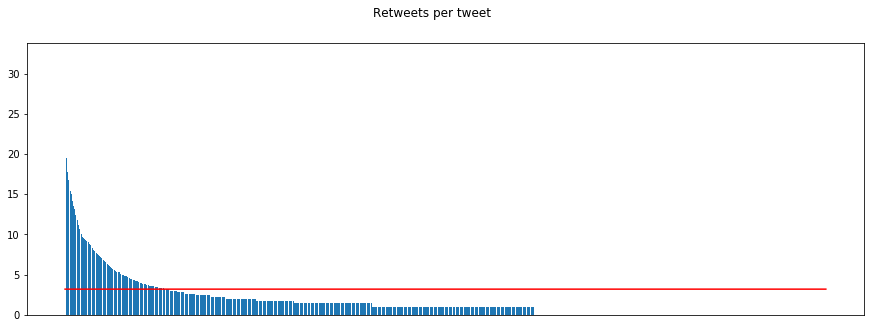

In [11]:
retweets_per_tweet_sql = "select id, retweet_count from tweet where retweet_count is not null"

plot_values('Retweets per tweet', 
           retweets_per_tweet_sql, 
           retweet_avg)

## FAVOURITES

In [12]:
favorite_avg_sql = "select avg(favorite_count) from tweet;"
favorite_min_sql = "select min(favorite_count) from tweet;"
favorite_max_sql = "select max(favorite_count) from tweet;"
favorite_stddev_sql = "select stddev(favorite_count) from tweet;"

cur.execute(favorite_avg_sql)
conn.commit()
favorite_avg = cur.fetchone()[0]

cur.execute(favorite_min_sql)
conn.commit()
favorite_min = cur.fetchone()[0]

cur.execute(favorite_max_sql)
conn.commit()
favorite_max = cur.fetchone()[0]

cur.execute(favorite_stddev_sql)
conn.commit()
favorite_stddev = cur.fetchone()[0]

print("FAVORITES")
print(favorite_avg)
print(favorite_min)
print(favorite_max)
print(favorite_stddev)

FAVORITES
33.6161430864480624
0
4371
155.012658127354


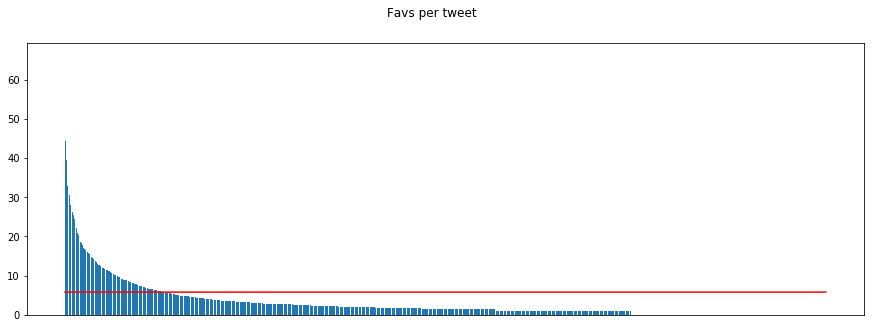

In [13]:
favs_per_tweet_sql = "select id, favorite_count from tweet where favorite_count is not null"

plot_values('Favs per tweet', 
           favs_per_tweet_sql, 
           favorite_avg)

## Tweets in DB per author

In [14]:
tweets_in_db_avg_sql = "select avg(ag.ct) from (select count(id) as ct, author_id from tweet group by author_id) as ag;"
tweets_in_db_min_sql = "select min(ag.ct) from (select count(id) as ct, author_id from tweet group by author_id) as ag;"
tweets_in_db_max_sql = "select max(ag.ct) from (select count(id) as ct, author_id from tweet group by author_id) as ag;"
tweets_in_db_stddev_sql = "select stddev(ag.ct) from (select count(id) as ct, author_id from tweet group by author_id) as ag;"

cur.execute(tweets_in_db_avg_sql)
conn.commit()
favorite_avg = cur.fetchone()[0]

cur.execute(tweets_in_db_min_sql)
conn.commit()
favorite_min = cur.fetchone()[0]

cur.execute(tweets_in_db_max_sql)
conn.commit()
favorite_max = cur.fetchone()[0]

cur.execute(tweets_in_db_stddev_sql)
conn.commit()
favorite_stddev = cur.fetchone()[0]

print("FAVORITES")
print(favorite_avg)
print(favorite_min)
print(favorite_max)
print(favorite_stddev)

FAVORITES
1.7989374744585206
1
158
5.3244325390804762


TypeError: unsupported operand type(s) for *: 'float' and 'Decimal'

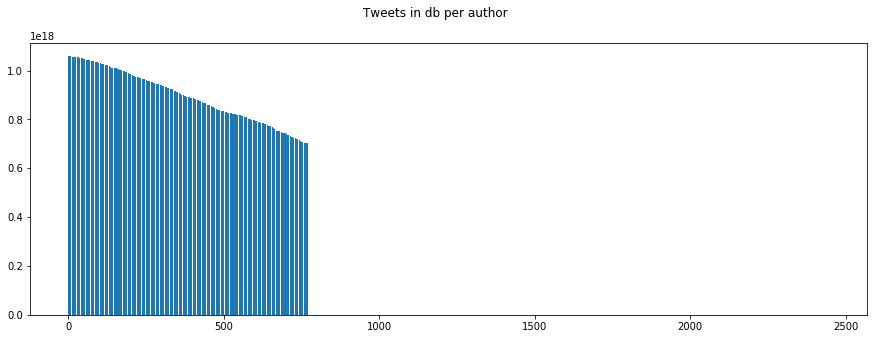

In [19]:
def plot_values(title, sql, avg):
    cur.execute(sql)
    conn.commit()
    result = cur.fetchall()
    # print(result[0:10])
    fba = [0 if x[1] is None else float(x[1]) for x in result]
    # print(fba[:10])
    fba.sort(reverse=True)
    # print(fba[:10])


    x = np.arange(len(fba))

    fig, ax = plt.subplots(figsize=(15, 5))
    plt.suptitle(title)
    plt.bar(x, fba)
    plt.plot(np.ones(len(fba))*avg, color='red')
    plt.xticks([])
    plt.show()

tweets_in_db_per_author_sql = "select count(id) as ct, author_id from tweet group by author_id order by ct desc"

plot_values('Tweets in db per author', 
           tweets_in_db_per_author_sql, 
           favorite_avg)

## Tweets per dates

[('11-06', 1344L), ('11-05', 2495L), ('11-04', 3877L), ('11-03', 462L), ('11-02', 1984L), ('11-01', 403L), ('10-31', 1112L), ('10-30', 979L), ('10-29', 1745L), ('10-28', 1359L)]
[1344, 2495, 3877, 462, 1984, 403, 1112, 979, 1745, 1359]
['11-06', '11-05', '11-04', '11-03', '11-02', '11-01', '10-31', '10-30', '10-29', '10-28']


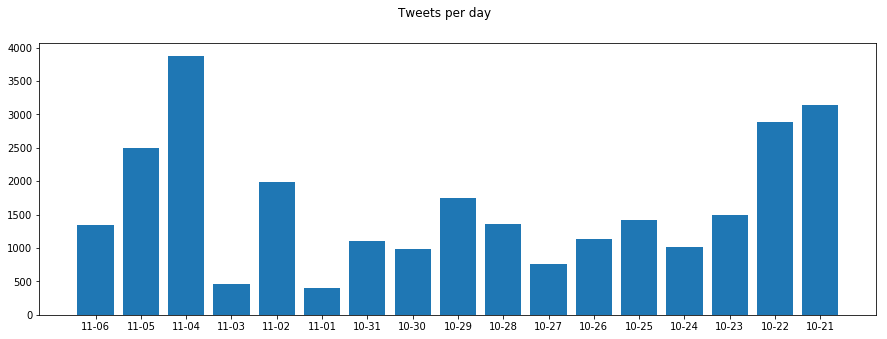

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_values(title, sql):
    cur.execute(sql)
    conn.commit()
    result = cur.fetchall()
    print(result[0:10])
    values = [int(x[1]) for x in result]
    labels = [x[0] for x in result]
    print(values[:10])
    print(labels[:10])


    x = np.arange(len(values))

    fig, ax = plt.subplots(figsize=(15, 5))
    plt.suptitle(title)
    plt.bar(x, values)
    plt.xticks(x, labels)
    plt.show()
    
query = """select substring(un.kiedy, 6, 12) as kiedy, count(*) as tweets 
from (select tweet.id as id, substring(tweet.date, 1, 10) as kiedy from tweet
union 
select tweet_id as id, to_char(re_tweet."date", 'YYYY-MM-DD') as kiedy from re_tweet) as un
group by kiedy
order by kiedy desc
limit 17 offset 1"""

plot_values('Tweets per day', 
    query)